In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Load the dataset
file_path = 'data/application_record.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Display the summary statistics of the dataset
print(df.describe())

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005 

In [52]:
# 1. Data Cleaning
# Handle missing values in 'OCCUPATION_TYPE' by imputing with a new category 'Unknown'
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Unknown')

# Cap outliers in 'CNT_CHILDREN' to a maximum of 5
df['CNT_CHILDREN'] = df['CNT_CHILDREN'].apply(lambda x: min(x, 5))

# Cap outliers in 'CNT_FAM_MEMBERS' to a maximum of 6
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].apply(lambda x: min(x, 6))

# Handle anomalies in 'DAYS_EMPLOYED' by replacing with NaN and imputing with median
df.loc[df['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = np.nan
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].fillna(df['DAYS_EMPLOYED'].median())

In [53]:
# 2. Feature Engineering
# Assuming 'FLAG_OWN_REALTY' indicates loan approval as a placeholder
df['TARGET'] = df['FLAG_OWN_REALTY'].apply(lambda x: 1 if x == 'Y' else 0)

# Select relevant features for the model
features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']
X = df[features]
y = df['TARGET']

In [54]:
# 3. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
# 4. Model Building
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [56]:
# 5. Model Evaluation
y_pred = log_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)

# Output results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.70
Confusion Matrix:
[[    0 40088]
 [    0 91480]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     40088
           1       0.70      1.00      0.82     91480

    accuracy                           0.70    131568
   macro avg       0.35      0.50      0.41    131568
weighted avg       0.48      0.70      0.57    131568



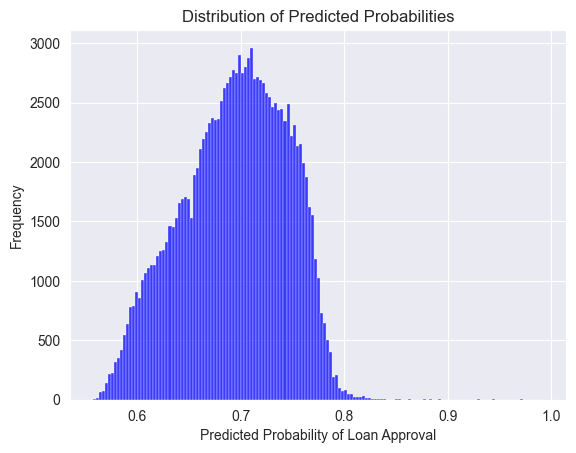

In [57]:
# 6. Gain and Lift Chart (example of a basic gain chart using cumulative gains)
y_probs = log_model.predict_proba(X_test)[:, 1]
sns.histplot(y_probs, kde=False, color="blue")
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Predicted Probability of Loan Approval")
plt.ylabel("Frequency")
plt.show()

In [58]:
# 7. Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)


Variance Inflation Factors (VIF):
            feature        VIF
0      CNT_CHILDREN   5.313572
1  AMT_INCOME_TOTAL   3.553354
2        DAYS_BIRTH  10.155003
3     DAYS_EMPLOYED   2.391179
4   CNT_FAM_MEMBERS  18.667316
